In [1]:
#DBSCAN
import pandas as pd
data= pd.read_csv("Mall_Customers.csv")
data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
data=data.drop('CustomerID',axis=1)

data=data.rename(columns={
                         'Annual Income (k$)':'Income',
                         'Spending Score (1–100)':'Spend_Score'
                         })


In [5]:
data.rename(columns={'Spending Score (1-100)': 'Spend_Score' }, inplace=True)

In [8]:
df=pd.get_dummies(data)

In [9]:
df.head(5)

,Age,Income,Spend_Score,Genre_Female,Genre_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
num2 = scaler.fit_transform(df)
num2 = pd.DataFrame(num2, columns = df.columns)

C:\Users\zeesh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [11]:
num2.head(5)

,Age,Income,Spend_Score,Genre_Female,Genre_Male
0,0.019231,0.000000,0.387755,0.0,1.0
1,0.057692,0.000000,0.816327,0.0,1.0
2,0.038462,0.008197,0.051020,1.0,0.0
3,0.096154,0.008197,0.775510,1.0,0.0
4,0.250000,0.016393,0.397959,1.0,0.0


In [12]:
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(
                             eps = .2, 
                             metric='euclidean', 
                             min_samples = 5,
                             n_jobs = -1)
clusters = outlier_detection.fit_predict(num2)

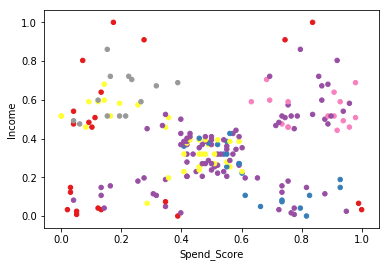

In [14]:
from matplotlib import cm

cmap = cm.get_cmap('Set1')
num2.plot.scatter(x='Spend_Score',y='Income', c=clusters, cmap=cmap,colorbar = False)

In [16]:
num2.head(5)

,Age,Income,Spend_Score,Genre_Female,Genre_Male
0,0.019231,0.000000,0.387755,0.0,1.0
1,0.057692,0.000000,0.816327,0.0,1.0
2,0.038462,0.008197,0.051020,1.0,0.0
3,0.096154,0.008197,0.775510,1.0,0.0
4,0.250000,0.016393,0.397959,1.0,0.0


In [18]:
#Isolation Forest
from sklearn.ensemble import IsolationForest
import numpy as np

rs=np.random.RandomState(0)
clf = IsolationForest(max_samples=100,random_state=rs, contamination=.1) 
clf.fit(df)


C:\Users\zeesh\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination=0.1,
        max_features=1.0, max_samples=100, n_estimators=100, n_jobs=None,
        random_state=<mtrand.RandomState object at 0x0000027C5177FEE8>,
        verbose=0)

In [34]:
if_scores = clf.decision_function(df)
if_anomalies=clf.predict(df)

if_anomalies=pd.Series(if_anomalies).replace([-1,1],[1,0])

if_anomalies=df[if_anomalies==1];

C:\Users\zeesh\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


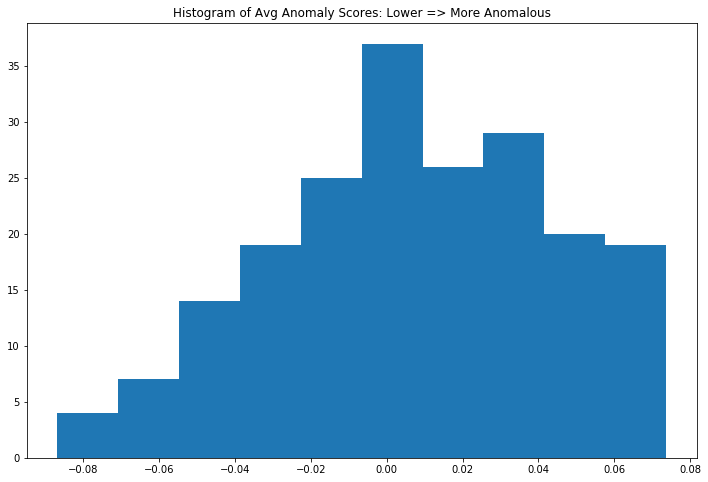

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.hist(if_scores);

plt.title('Histogram of Avg Anomaly Scores: Lower => More Anomalous');

Text(0.5, 1.0, 'Isolation Forests - Anomalies')

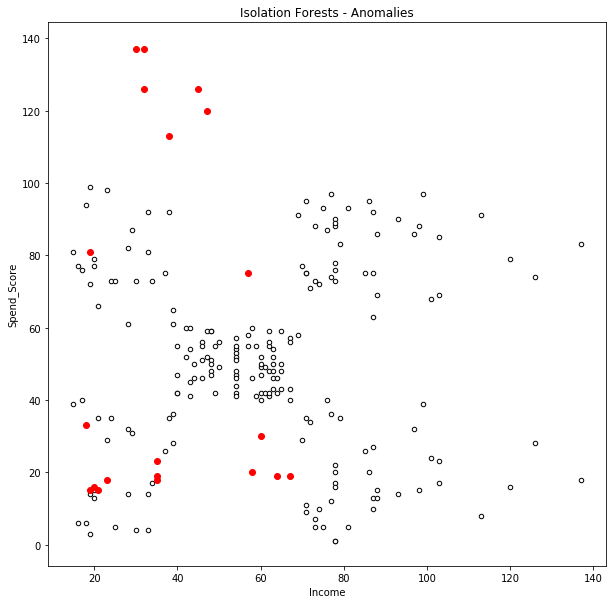

In [37]:
cmap=np.array(['white','red'])

plt.figure(figsize=(10,10))
plt.scatter(df.iloc[:,1],df.iloc[:,2],c='white',s=20,edgecolor='k')
plt.scatter(if_anomalies.iloc[:,0],if_anomalies.iloc[:,1],c='red')

plt.xlabel('Income')
plt.ylabel('Spend_Score')
plt.title('Isolation Forests - Anomalies')

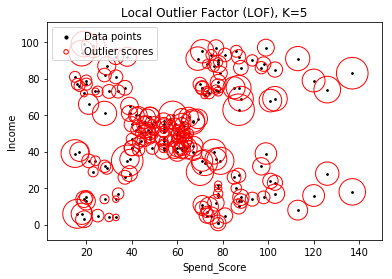

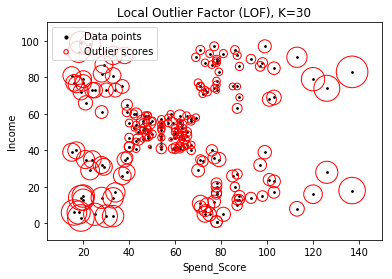

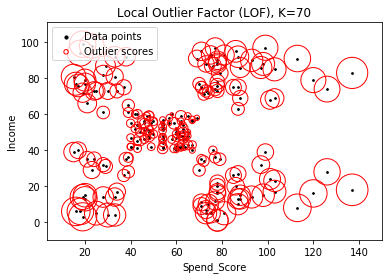

In [41]:
def LOF_plot(k):
 import seaborn as sns
 from sklearn.neighbors import LocalOutlierFactor
    
 var1,var2=1,2
 clf = LocalOutlierFactor(n_neighbors=k, contamination=.1)
 y_pred = clf.fit_predict(df)
 LOF_Scores = clf.negative_outlier_factor_
 
 plt.title('Local Outlier Factor (LOF), K={}'.format(k))
 plt.scatter(df.iloc[:, var1], df.iloc[:, var2], color='k', s=3., label='Data points')

 radius = (LOF_Scores.max() - LOF_Scores) / (LOF_Scores.max() - LOF_Scores.min())
 plt.scatter(df.iloc[:, var1], df.iloc[:, var2], s=1000 * radius, edgecolors='r',
 facecolors='none', label='Outlier scores')
 
 plt.axis('tight')
 plt.ylabel('{}'.format(df.columns[var1]))
 plt.xlabel('{}'.format(df.columns[var2]))
 legend = plt.legend(loc='upper left')
 legend.legendHandles[0]._sizes = [10]
 legend.legendHandles[1]._sizes = [20]
 plt.show();

LOF_plot(5)
LOF_plot(30)
LOF_plot(70)


In [42]:
#Sklearn localOutlierFactor
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=30, contamination=.1)
y_pred = clf.fit_predict(df)

LOF_Scores = clf.negative_outlier_factor_
LOF_pred=pd.Series(y_pred).replace([-1,1],[1,0])
LOF_anomalies=df[LOF_pred==1]

Text(0, 0.5, 'Spend_Score')

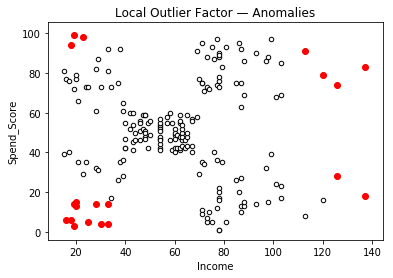

In [47]:
cmap=np.array(['white','red'])
plt.scatter(df.iloc[:,1],df.iloc[:,2],c='white',s=20,edgecolor='k')
plt.scatter(LOF_anomalies.iloc[:,1],LOF_anomalies.iloc[:,2],c='red')
 #,marker=’x’,s=100)
plt.title('Local Outlier Factor — Anomalies')
plt.xlabel('Income')
plt.ylabel('Spend_Score')


In [64]:
#One Class SVM
from sklearn import svm
clf=svm.OneClassSVM(nu=.2,kernel='rbf',gamma=.001)
clf.fit(df)
y_pred=clf.predict(df)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

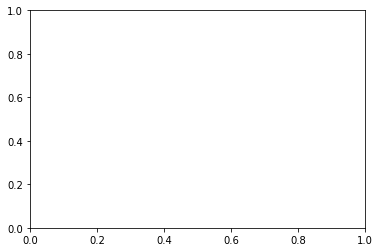

In [70]:
df.plot.scatter(x='Income',y='Spend_Score', c=y_pred, cmap=cmap, colorbar = False)

plt.title('One-Class SVM — Anomalies');
